In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import math

from collections import OrderedDict

torch.set_printoptions(linewidth=150)


In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST'
    , train=True
    , download=True
    , transform=transforms.Compose([
          transforms.ToTensor()
    ])
)

In [3]:
image,label = train_set[0]
image.shape

torch.Size([1, 28, 28])

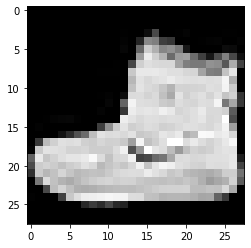

In [4]:
plt.imshow(image.squeeze(),cmap='gray')

In [5]:
train_set.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
in_features = image.numel()
in_features

784

In [7]:
out_features = math.floor(in_features/2)
out_features

392

In [8]:
out_classes = len(train_set.classes)
out_classes

10

In [9]:
network1 = nn.Sequential(
nn.Flatten(start_dim=1)
,nn.Linear(in_features,out_features),
nn.Linear(out_features,out_classes)
)

network1

Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=392, bias=True)
  (2): Linear(in_features=392, out_features=10, bias=True)
)

In [10]:
image = image.unsqueeze(0)
image.shape

torch.Size([1, 1, 28, 28])

In [11]:
network1(image)

tensor([[ 0.0336,  0.1845,  0.2189, -0.3218, -0.0163, -0.2559,  0.2632, -0.2125,  0.1679, -0.1857]], grad_fn=<AddmmBackward>)

In [12]:
layers = OrderedDict([
    ('flat',nn.Flatten(start_dim=1))
    ,('hidden',nn.Linear(in_features,out_features))
    ,('output',nn.Linear(out_features,out_classes))
])

network2 = nn.Sequential(layers)
network2

Sequential(
  (flat): Flatten()
  (hidden): Linear(in_features=784, out_features=392, bias=True)
  (output): Linear(in_features=392, out_features=10, bias=True)
)

In [13]:
network2(image)

tensor([[ 0.1123,  0.1087, -0.0373,  0.0201,  0.1538, -0.3278,  0.2009, -0.3250, -0.1986,  0.2946]], grad_fn=<AddmmBackward>)

In [14]:
torch.manual_seed(50) #what random numbers will be generated
network1 = nn.Sequential(
nn.Flatten(start_dim=1)
,nn.Linear(in_features,out_features)
,nn.Linear(out_features,out_classes)
)

torch.manual_seed(50) #once it's used, it's state changes. have to set it back again
layers = OrderedDict([
     ('flat',nn.Flatten(start_dim=1))
    ,('hidden',nn.Linear(in_features,out_features))
    ,('output',nn.Linear(out_features,out_classes))
])

network2 = nn.Sequential(layers)

In [15]:
network1(image),network2(image)

(tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,  0.1819, -0.0168]], grad_fn=<AddmmBackward>),
 tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,  0.1819, -0.0168]], grad_fn=<AddmmBackward>))

In [16]:
torch.manual_seed(50)
network3 = nn.Sequential()
network3.add_module('flat',nn.Flatten(start_dim=1))
network3.add_module('hidden',nn.Linear(in_features,out_features))
network3.add_module('output',nn.Linear(out_features,out_classes))
network3

Sequential(
  (flat): Flatten()
  (hidden): Linear(in_features=784, out_features=392, bias=True)
  (output): Linear(in_features=392, out_features=10, bias=True)
)

In [17]:
network1(image),network2(image),network3(image)

(tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,  0.1819, -0.0168]], grad_fn=<AddmmBackward>),
 tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,  0.1819, -0.0168]], grad_fn=<AddmmBackward>),
 tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,  0.1819, -0.0168]], grad_fn=<AddmmBackward>))

In [18]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        # (1) input layer
        t = t

        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12*4*4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t,dim=1)

        return t

In [19]:
torch.manual_seed(50)
network =Network()
network
network(image)

tensor([[-0.0957,  0.1053, -0.1055,  0.1547, -0.0366, -0.0132,  0.0749, -0.1152,  0.0426,  0.0639]], grad_fn=<AddmmBackward>)

In [20]:
torch.manual_seed(50)

sequential1 = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    ,nn.ReLU()
    ,nn.MaxPool2d(kernel_size=2,stride=2)
    ,nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    ,nn.ReLU()
    ,nn.MaxPool2d(kernel_size=2,stride=2)
    ,nn.Flatten(start_dim=1)
    ,nn.Linear(in_features=12*4*4,out_features=120)
    ,nn.ReLU()
    ,nn.Linear(in_features=120,out_features=60)
    ,nn.ReLU()
    ,nn.Linear(in_features=60,out_features=10)   
)

In [21]:
torch.manual_seed(50)
layers = OrderedDict([
    ('conv1',nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5))
    ,('relu1',nn.ReLU())
    ,('maxpool1',nn.MaxPool2d(kernel_size=2,stride=2))
    
    ,('conv2',nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5))
    ,('relu2',nn.ReLU())
    ,('maxpool2',nn.MaxPool2d(kernel_size=2,stride=2))
    
    ,('flatten',nn.Flatten(start_dim=1))
    ,('fc1',nn.Linear(in_features=12*4*4,out_features=120))
    ,('relu3',nn.ReLU())
    
    ,('fc2',nn.Linear(in_features=120,out_features=60))
    ,('relu4',nn.ReLU())
    ,('out',nn.Linear(in_features=60,out_features=10))
])

sequential2 =nn.Sequential(layers)

In [22]:
torch.manual_seed(50)
sequential3 = nn.Sequential()
sequential3.add_module('conv1',nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5))
sequential3.add_module('relu1',nn.ReLU())
sequential3.add_module('maxpool1',nn.MaxPool2d(kernel_size=2,stride=2))

sequential3.add_module('conv2',nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5))
sequential3.add_module('relu2',nn.ReLU())
sequential3.add_module('maxpool2',nn.MaxPool2d(kernel_size=2,stride=2))

sequential3.add_module('flatten',nn.Flatten(start_dim=1))
sequential3.add_module('fc1',nn.Linear(in_features=12*4*4,out_features=120))
sequential3.add_module('relu3',nn.ReLU())

sequential3.add_module('fc2',nn.Linear(in_features=120,out_features=60))
sequential3.add_module('relu4',nn.ReLU())
sequential3.add_module('output',nn.Linear(in_features=60,out_features=10))
sequential3

Sequential(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten()
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (relu4): ReLU()
  (output): Linear(in_features=60, out_features=10, bias=True)
)

In [23]:
sequential1

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten()
  (7): Linear(in_features=192, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=60, bias=True)
  (10): ReLU()
  (11): Linear(in_features=60, out_features=10, bias=True)
)

In [24]:
sequential2

Sequential(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten()
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (relu4): ReLU()
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [25]:
image.shape

torch.Size([1, 1, 28, 28])

In [26]:
network(image),sequential1(image),sequential2(image),sequential3(image)

(tensor([[-0.0957,  0.1053, -0.1055,  0.1547, -0.0366, -0.0132,  0.0749, -0.1152,  0.0426,  0.0639]], grad_fn=<AddmmBackward>),
 tensor([[-0.0957,  0.1053, -0.1055,  0.1547, -0.0366, -0.0132,  0.0749, -0.1152,  0.0426,  0.0639]], grad_fn=<AddmmBackward>),
 tensor([[-0.0957,  0.1053, -0.1055,  0.1547, -0.0366, -0.0132,  0.0749, -0.1152,  0.0426,  0.0639]], grad_fn=<AddmmBackward>),
 tensor([[-0.0957,  0.1053, -0.1055,  0.1547, -0.0366, -0.0132,  0.0749, -0.1152,  0.0426,  0.0639]], grad_fn=<AddmmBackward>))